In [1]:
import io
from IPython.nbformat import current
def execute_notebook(nbfile):
    with io.open(nbfile) as f:
        nb = current.read(f, 'json')
    ip = get_ipython()
    for cell in nb.worksheets[0].cells:
        if cell.cell_type != 'code':
            continue
        ip.run_cell(cell.input)
execute_notebook("/cellar/users/ramarty/Projects/hla_ii/bin/imports.ipynb")

Populating the interactive namespace from numpy and matplotlib


/cellar/users/ramarty/anaconda/lib/python2.7/site-packages/IPython/nbformat/current.py:19: UserWarning: IPython.nbformat.current is deprecated.

- use IPython.nbformat for read/write/validate public API
- use IPython.nbformat.vX directly to composing notebooks of a particular version

  """)


In [2]:
classI = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/combined_classes/patient_affinities.class_i.csv', index_col=0)
classII = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/combined_classes/patient_affinities.class_ii.csv', index_col=0)

In [3]:
classI.shape, classII.shape

((7085, 1017), (7085, 1017))

In [3]:
def get_values_from_df(df):
    values = []
    for a in df.values:
        values.extend(a)
    return values

In [28]:
classI_values = pd.Series(get_values_from_df(classI))
classII_values = pd.Series(get_values_from_df(classII))

In [84]:
classI_percentiles = [classI_values.quantile(x) for x in np.arange(0, 1.02, .02)]
classII_percentiles = [classII_values.quantile(x) for x in np.arange(0, 1.02, .02)]

In [85]:
classII_percentiles

[0.0239908398611,
 0.44127155172399996,
 1.0825331654600001,
 1.6711879599935995,
 2.2683745802800002,
 2.9060157601399998,
 3.5297156935127987,
 4.1599103273144031,
 4.8190184837551993,
 5.4892459897691985,
 6.1755741522000012,
 6.8207957576811991,
 7.4501473937427978,
 8.0792635933699994,
 8.7515440265244031,
 9.4496868001499994,
 10.155922949248001,
 10.868464040748,
 11.5862068966,
 12.317575193028002,
 13.072293070499999,
 13.8544493392,
 14.636750161799998,
 15.432353425100001,
 16.257771758983996,
 17.105164066700002,
 17.984440106532002,
 18.947132379700001,
 19.967795738900001,
 21.077771927119997,
 22.258991838699998,
 23.525248130760005,
 24.829440882499998,
 26.2240047232,
 27.723720947647998,
 29.295944846100006,
 30.957477904191997,
 32.7024521783,
 34.599647356399998,
 36.616765486500029,
 38.823993591499999,
 41.276845914056018,
 44.058303609100001,
 47.23382424399999,
 50.887061878000004,
 55.431472081199999,
 61.421895032899997,
 68.703356096099995,
 76.96149040770399

In [86]:
total_values = float(classII_binary.shape[0]*classII_binary.shape[1])

In [87]:
both, neither, single = [], [], []
count = 1
for I, II in zip(classI_percentiles, classII_percentiles):
    classI_binary = classI.copy()
    classII_binary = classII.copy()
    def make_binary(x):
        if x < I:
            return 1
        else:
            return 0
    for col in classI_binary.columns:
        classI_binary[col] = classI[col].apply(make_binary)
    def make_binary(x):
        if x < II:
            return 1
        else:
            return 0   
    for col in classII_binary.columns:
        classII_binary[col] = classII[col].apply(make_binary)
    # percentage in both, percentage in neither, percentage in individual
    both.append(np.multiply(classII_binary.as_matrix(), classI_binary.as_matrix()).sum()/total_values)
    single.append(np.sum(classII_binary.as_matrix())/total_values)
    print count
    count += 1

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42


KeyboardInterrupt: 

In [90]:
len(both), len(np.arange(0, 1.02, .02))

(42, 51)

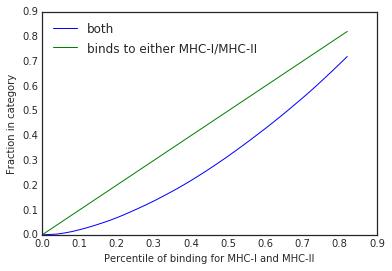

In [98]:
plt.plot(np.arange(0, 1.02, .02)[:42], both, label='both')
plt.plot(np.arange(0, 1.02, .02)[:42], single, label='binds to either MHC-I/MHC-II')
plt.xlabel('Percentile of binding for MHC-I and MHC-II')
plt.ylabel('Fraction in category')
plt.legend(loc=0)

In [4]:
classI_file = '/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/combined_classes/patient_affinities.germline.class_i.csv'
classII_file = '/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/combined_classes/patient_affinities.germline.class_ii.csv'

In [25]:
def plot_dist(classI_file, class_II_file):

    classI = pd.read_csv(classI_file, index_col=0)
    classII = pd.read_csv(classII_file, index_col=0)

    classI_values = pd.Series(get_values_from_df(classI))
    classII_values = pd.Series(get_values_from_df(classII))

    classI_percentiles = [classI_values.quantile(x) for x in np.arange(0, 1.02, .02)]
    classII_percentiles = [classII_values.quantile(x) for x in np.arange(0, 1.02, .02)]

    total_values = float(classII.shape[0]*classII.shape[1])

    both, neither, single = [], [], []
    count = 1
    for I, II in zip(classI_percentiles, classII_percentiles):
        classI_binary = classI.copy()
        classII_binary = classII.copy()
        def make_binary(x):
            if x < I:
                return 1
            else:
                return 0
        for col in classI_binary.columns:
            classI_binary[col] = classI[col].apply(make_binary)
        def make_binary(x):
            if x < II:
                return 1
            else:
                return 0   
        for col in classII_binary.columns:
            classII_binary[col] = classII[col].apply(make_binary)
        both.append(np.multiply(classII_binary.as_matrix(), classI_binary.as_matrix()).sum()/total_values)
        single.append(np.sum(classII_binary.as_matrix())/total_values)
        if count % 10 == 0:
            print count
        count += 1

    plt.plot(np.arange(0, 1.02, .02), both, label='both')
    plt.plot(np.arange(0, 1.02, .02), single, label='binds to either MHC-I/MHC-II')
    plt.xlabel('Percentile of binding for MHC-I and MHC-II')
    plt.ylabel('Fraction in category')
    plt.legend(loc=0)
    plt.show()
    return both, single

10
20
30
40
50


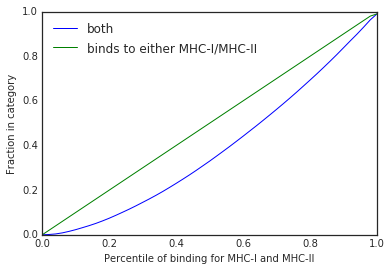

In [28]:
classI_file = '/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/combined_classes/patient_affinities.germline.class_i.csv'
classII_file = '/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/combined_classes/patient_affinities.germline.class_ii.csv'
germline_both, germline_single = plot_dist(classI_file, classII_file)

10
20
30
40
50


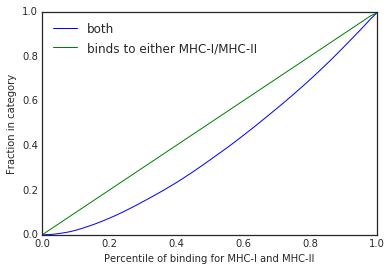

In [29]:
classI_file = '/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/combined_classes/patient_affinities.passenger.class_i.csv'
classII_file = '/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/combined_classes/patient_affinities.passenger.class_ii.csv'
passenger_both, passenger_single = plot_dist(classI_file, classII_file)

10
20
30
40
50


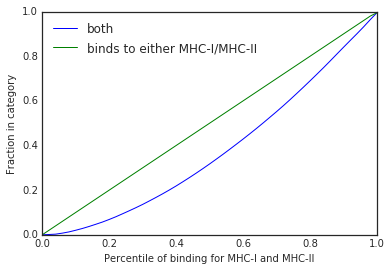

In [27]:
classI_file = '/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/combined_classes/patient_affinities.class_i.csv'
classII_file = '/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/combined_classes/patient_affinities.class_ii.csv'
cancer_both, cancer_single = plot_dist(classI_file, classII_file)

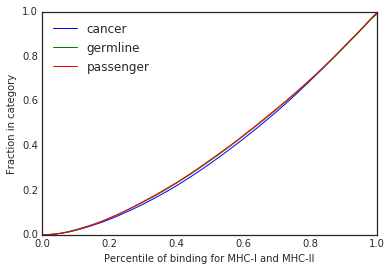

In [30]:
plt.plot(np.arange(0, 1.02, .02), cancer_both, label='cancer')
plt.plot(np.arange(0, 1.02, .02), germline_both, label='germline')
plt.plot(np.arange(0, 1.02, .02), passenger_both, label='passenger')

plt.xlabel('Percentile of binding for MHC-I and MHC-II')
plt.ylabel('Fraction in category')
plt.legend(loc=0)
plt.show()

Split by mutated/non-mutated

In [21]:
classI_file = '/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/combined_classes/patient_affinities.class_i.csv'
classII_file = '/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/combined_classes/patient_affinities.class_ii.csv'
classI = pd.read_csv(classI_file, index_col=0)
classII = pd.read_csv(classII_file, index_col=0)

In [22]:
patient_mutations = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/combined_classes/patient_mutations.csv', index_col=0)

In [36]:
# acquired
classI_values_aq, classII_values_aq, classI_values_no, classII_values_no = [], [], [], []
for i, patient in enumerate(list(patient_mutations.index)):
    acquired = list(patient_mutations.ix[patient][patient_mutations.ix[patient] == 1].index)
    not_acquired = list(patient_mutations.ix[patient][patient_mutations.ix[patient] == 0].index)
    # classI
    classI_values_aq.extend((list(classI.ix[patient, acquired])))
    classI_values_no.extend((list(classI.ix[patient, not_acquired])))
    # classII
    classII_values_aq.extend((list(classII.ix[patient, acquired])))
    classII_values_no.extend((list(classII.ix[patient, not_acquired])))

classI_values_aq = pd.Series(classI_values_aq)
classI_values_no = pd.Series(classI_values_no)
classII_values_aq = pd.Series(classII_values_aq)
classII_values_no = pd.Series(classII_values_no)

In [60]:
def plot(classI_values, classII_values):
    classI_percentiles = [classI_values.quantile(x) for x in np.arange(0, 1.02, .02)]
    classII_percentiles = [classII_values.quantile(x) for x in np.arange(0, 1.02, .02)]

    total_values = len(classI_values)

    both, neither, single = [], [], []
    count = 1
    for I, II in zip(classI_percentiles, classII_percentiles):
        classI_binary = classI_values.copy()
        classII_binary = classII_values.copy()
        def make_binary(x):
            if x < I:
                return 1
            else:
                return 0
        classI_binary = classI_binary.apply(make_binary)
        def make_binary(x):
            if x < II:
                return 1
            else:
                return 0   
        classII_binary = classII_binary.apply(make_binary)
        both.append(np.sum(classI_binary*classII_binary)/float(len(classI_values)))
        single.append(np.sum(classII_binary)/float(len(classI_values)))
        count += 1

    plt.plot(np.arange(0, 1.02, .02), both, label='both')
    plt.plot(np.arange(0, 1.02, .02), single, label='binds to either MHC-I/MHC-II')
    plt.xlabel('Percentile of binding for MHC-I and MHC-II')
    plt.ylabel('Fraction in category')
    plt.legend(loc=0)
    plt.show()
    
    return both, single

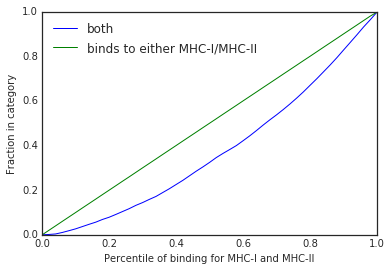

In [61]:
both_aq, single_aq = plot(classI_values_aq, classII_values_aq)

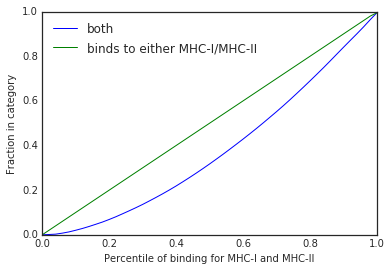

In [62]:
both_no, single_no = plot(classI_values_no, classII_values_no)

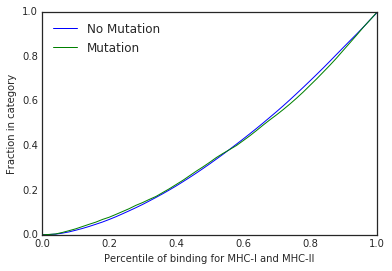

In [63]:
plt.plot(np.arange(0, 1.02, .02), both_no, label='No Mutation')
plt.plot(np.arange(0, 1.02, .02), both_aq, label='Mutation')

plt.xlabel('Percentile of binding for MHC-I and MHC-II')
plt.ylabel('Fraction in category')
plt.legend(loc=0)
plt.show()